In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import os
import numpy as np
import cv2
from skimage import exposure
from sklearn.model_selection import train_test_split

# Configurações
IMG_SIZE = 128
BASE_DIR = '/content/drive/MyDrive/CattleImageRepository (1)'

def load_and_preprocess_data(base_dir, subdirs):
    X, y = [], []
    for subdir in subdirs:
        if subdir == 'G3/30-07/frames_juntos':
            # Todas as imagens estão na mesma pasta
            full_path = os.path.join(base_dir, subdir)
            x_files = sorted([f for f in os.listdir(full_path) if f.endswith(('x.png', 'x1.png', 'x.jpeg', 'x1.jpeg'))])
            image_count = 0  # Contador de imagens

            for x_file in x_files:
                y_file = x_file.replace('x.', 'y.').replace('x1.', 'y1.')
                if os.path.exists(os.path.join(full_path, y_file)):
                    img = cv2.imread(os.path.join(full_path, x_file))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                    X.append(img)

                    mask = cv2.imread(os.path.join(full_path, y_file))
                    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
                    mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))
                    y.append(mask)

                    image_count += 1

            print(f"{subdir}: {image_count} imagens processadas.")

        else:

            full_path = os.path.join(base_dir, *subdir.split('/'))
            x_dir = os.path.join(full_path, 'X')
            y_dir = os.path.join(full_path, 'Y')

            if not os.path.exists(y_dir):
                y_dir = os.path.join(full_path, 'y')

            if not os.path.exists(x_dir):
                x_dir = os.path.join(full_path, 'x1_files')
                y_dir = os.path.join(full_path, 'y1_files')

            if os.path.exists(x_dir) and os.path.exists(y_dir):
                x_files = sorted([f for f in os.listdir(x_dir) if f.endswith(('x.png', 'x1.png', 'x.jpeg', 'x1.jpeg'))])
                image_count = 0  # Contador de imagens

                for x_file in x_files:
                    y_file = x_file.replace('x.', 'y.').replace('x1.', 'y1.')
                    if os.path.exists(os.path.join(y_dir, y_file)):
                        img = cv2.imread(os.path.join(x_dir, x_file))
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                        X.append(img)

                        mask = cv2.imread(os.path.join(y_dir, y_file))
                        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
                        mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))
                        y.append(mask)

                        image_count += 1  # Incrementa o contador

                x_dir = os.path.join(full_path, 'x2_files')
                y_dir = os.path.join(full_path, 'y2_files')

                if os.path.exists(x_dir) and os.path.exists(y_dir):

                  x_files = sorted([f for f in os.listdir(x_dir) if f.endswith(('x.png', 'x1.png', 'x.jpeg', 'x1.jpeg'))])
                  image_count = 0  # Contador de imagens

                  for x_file in x_files:
                      y_file = x_file.replace('x.', 'y.').replace('x1.', 'y1.')
                      if os.path.exists(os.path.join(y_dir, y_file)):
                          img = cv2.imread(os.path.join(x_dir, x_file))
                          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                          img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                          X.append(img)

                          mask = cv2.imread(os.path.join(y_dir, y_file))
                          mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
                          mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))
                          y.append(mask)

                          image_count += 1  # Incrementa o contador

                print(f"{subdir}: {image_count} imagens processadas.")
            else:
                print(f"Erro: Pastas 'X' ou 'Y/y' não encontradas em {subdir}")

    return np.array(X), np.array(y)

# Lista de subdiretórios a serem processados
subdirs = [
    'G1/01-08-2024', 'G1/08-08-2024',
    'G2/29-07/00000000196000500', 'G2/29-07/00000000196000400',
    'G2/06-08/Video 1', 'G2/06-08/Video 2',
    'G3/30-07/frames_juntos', 'G3/30-07',
    'G4/02-08'
]

X, y = load_and_preprocess_data(BASE_DIR, subdirs)
X = np.expand_dims(X, axis=-1)
y = np.expand_dims(y, axis=-1)

KeyboardInterrupt: 

(128, 128, 3)


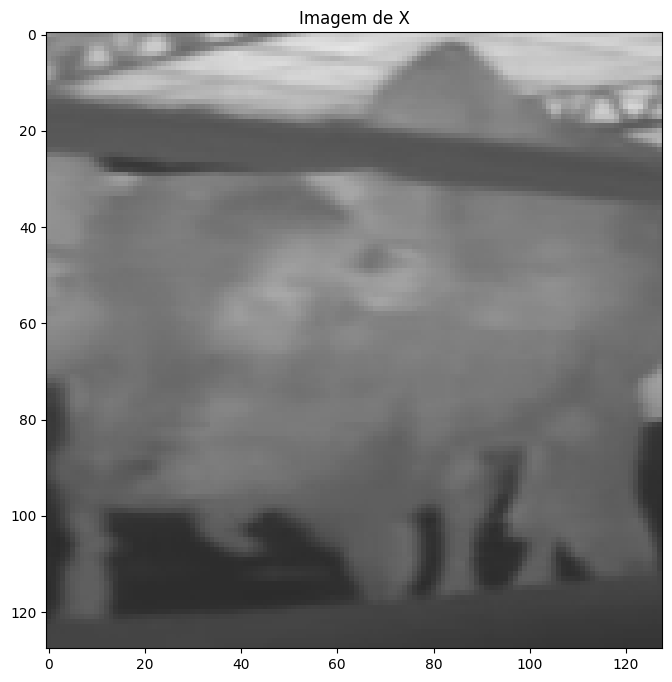

In [13]:
import matplotlib.pyplot as plt

image = X[np.random.randint(0, X.shape[0])]

if image.shape[-1] == 1:
    image = image.squeeze()

print(image.shape)

plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title(f'Imagem de X')
plt.show()

In [14]:
X.shape, y.shape

((2454, 128, 128, 3, 1), (2454, 128, 128, 3, 1))

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

Shape de X_train: (1963, 128, 128, 3, 1)
Shape de X_test: (491, 128, 128, 3, 1)
Shape de y_train: (1963, 128, 128, 3, 1)
Shape de y_test: (491, 128, 128, 3, 1)


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

def apply_data_augmentation(X, y, variations=2):

    X_augmented = []
    y_augmented = []

    datagen = ImageDataGenerator(
        rotation_range=5,
        zoom_range=0.2,
        width_shift_range=0.05,
        height_shift_range=0.05,
        brightness_range=[0.8, 1.2],
        channel_shift_range=50,
        horizontal_flip=True,
        vertical_flip=False,
        fill_mode='nearest'
    )

    for i in range(X.shape[0]):

        image = X[i]
        mask = y[i]

        if image.ndim == 4:
            image = image.squeeze()
        if mask.ndim == 4:
            mask = mask.squeeze()

        for j in range(variations):
            params = datagen.get_random_transform(image.shape)

            augmented_image = datagen.apply_transform(image, params)
            augmented_mask = datagen.apply_transform(mask, params)

            if augmented_image.max() > 1:
                augmented_image = augmented_image / 255.0

            if augmented_mask.max() > 1:
                augmented_mask = augmented_mask / 255.0

            # plt.imshow(augmented_image)
            # plt.axis('off')
            # plt.show()

            # plt.imshow(augmented_mask)
            # plt.axis('off')
            # plt.show()

            X_augmented.append(augmented_image)
            y_augmented.append(augmented_mask)

    return np.array(X_augmented), np.array(y_augmented)

X_train_augmented, y_train_augmented = apply_data_augmentation(X_train, y_train)

In [18]:
X_train_augmented.shape, y_train_augmented.shape

((3926, 128, 128, 3), (3926, 128, 128, 3))

In [19]:
def transform_dimensions(X, y, variations=3, normalize=False):
    X_transform = []
    y_transform = []

    for i in range(X.shape[0]):
        image = X[i]
        mask = y[i]

        if image.ndim == 4:
            image = image.squeeze()
        if mask.ndim == 4:
            mask = mask.squeeze()

        if normalize:
          image = image / 255.0
          mask = mask / 255.0

        X_transform.append(image)
        y_transform.append(mask)

    return np.array(X_transform), np.array(y_transform)

X_train_transformed, y_train_transformed = transform_dimensions(X_train_augmented, y_train_augmented)
X_test_transformed, y_teste_transformed = transform_dimensions(X_test, y_test)

In [20]:
X_train_augmented = np.concatenate((X_train_transformed, X_train_augmented), axis=0)
y_train_augmented = np.concatenate((y_train_transformed, y_train_augmented), axis=0)

(-0.5, 127.5, 127.5, -0.5)

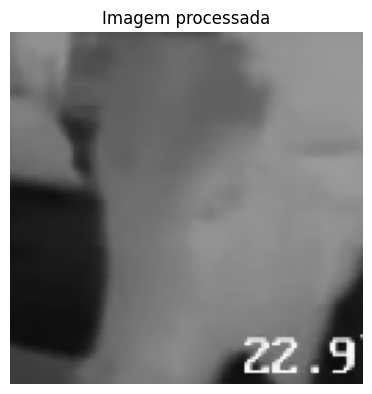

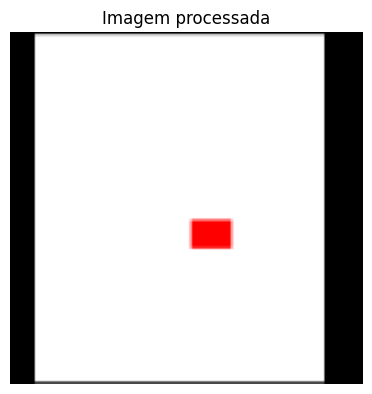

In [21]:
index = np.random.randint(0, X_test.shape[0])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X_test_transformed[index])
plt.title("Imagem processada")
plt.axis('off')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(y_teste_transformed[index])
plt.title("Imagem processada")
plt.axis('off')

In [22]:
X_train_augmented.shape, y_train_augmented.shape

((7852, 128, 128, 3), (7852, 128, 128, 3))

In [23]:
X_test_transformed.shape, y_teste_transformed.shape

((491, 128, 128, 3), (491, 128, 128, 3))

In [24]:
X_test_transformed = X_test_transformed / 255
y_teste_transformed = y_teste_transformed / 255

(-0.5, 127.5, 127.5, -0.5)

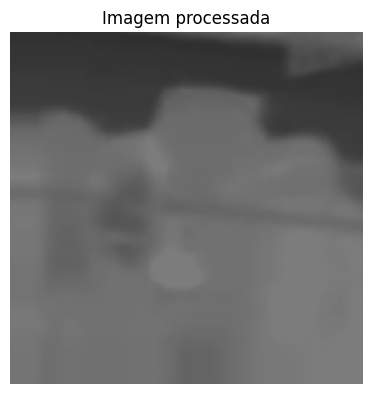

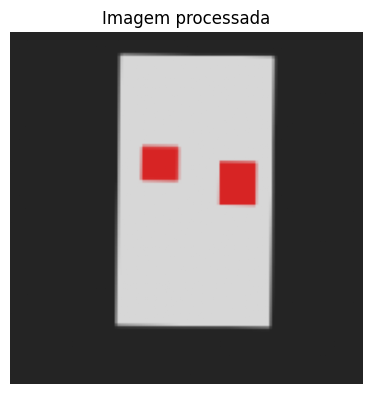

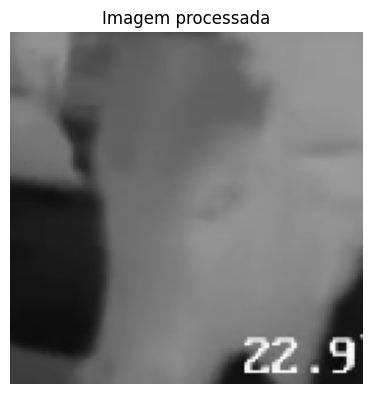

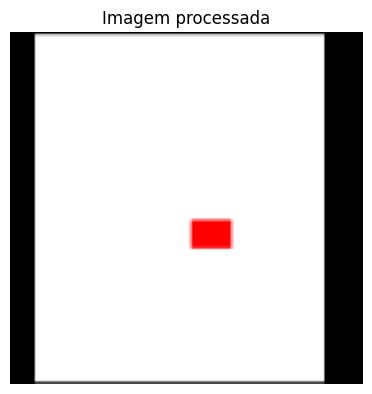

In [29]:
index_train = np.random.randint(0, X_test_transformed.shape[0])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X_train_augmented[index])
plt.title("Imagem processada")
plt.axis('off')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(y_train_augmented[index])
plt.title("Imagem processada")
plt.axis('off')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X_test_transformed[index])
plt.title("Imagem processada")
plt.axis('off')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(y_teste_transformed[index])
plt.title("Imagem processada")
plt.axis('off')

In [33]:
X_train_augmented.shape, y_train_augmented.shape

((7852, 128, 128, 3), (7852, 128, 128, 3))

In [32]:
X_test_transformed.shape, y_teste_transformed.shape

((491, 128, 128, 3), (491, 128, 128, 3))

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, BatchNormalization, Activation, Dropout, Add
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
import tensorflow.keras.backend as K

def dice_coefficient(y_true, y_pred, smooth=1):
    y_true = tf.cast(y_true, tf.float32)
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean((2. * intersection + smooth) / (union + smooth), axis=0)

def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

def combined_loss(y_true, y_pred):
    return 0.5 * dice_loss(y_true, y_pred) + 0.5 * tf.keras.losses.mean_squared_error(y_true, y_pred)

def resnet_block(input_tensor, num_filters, dropout_rate=0.1):
    x = Conv2D(num_filters, 3, padding='same', use_bias=False,
               kernel_regularizer=l1_l2(l1=1e-6, l2=1e-4))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(dropout_rate)(x)
    x = Conv2D(num_filters, 3, padding='same', use_bias=False,
               kernel_regularizer=l1_l2(l1=1e-6, l2=1e-4))(x)
    x = BatchNormalization()(x)

    if input_tensor.shape[-1] != num_filters:
        input_tensor = Conv2D(num_filters, 1, padding='same', use_bias=False,
                              kernel_regularizer=l1_l2(l1=1e-6, l2=1e-4))(input_tensor)

    x = Add()([x, input_tensor])
    x = Activation('relu')(x)
    return x

def attention_gate(x, g, inter_channel):
    theta_x = Conv2D(inter_channel, 1, use_bias=False, kernel_regularizer=l1_l2(l1=1e-6, l2=1e-4))(x)
    phi_g = Conv2D(inter_channel, 1, use_bias=False, kernel_regularizer=l1_l2(l1=1e-6, l2=1e-4))(g)
    f = Activation('relu')(theta_x + phi_g)
    psi_f = Conv2D(1, 1, use_bias=False, kernel_regularizer=l1_l2(l1=1e-6, l2=1e-4))(f)
    rate = Activation('sigmoid')(psi_f)
    att_x = x * rate
    return att_x

def resnet_unet(input_size=(128, 128, 3), num_classes=3):
    inputs = Input(input_size)

    # ResNet50 como encoder (caminho de downsampling)
    resnet = ResNet50(weights='imagenet', include_top=False, input_tensor=inputs)

    # Congelar as camadas iniciais do ResNet50
    for layer in resnet.layers[:100]:
        layer.trainable = False

    # Obter a saída de cada bloco para usar nas conexões skip
    c1 = resnet.get_layer('conv1_relu').output
    c2 = resnet.get_layer('conv2_block3_out').output
    c3 = resnet.get_layer('conv3_block4_out').output
    c4 = resnet.get_layer('conv4_block6_out').output

    # Bridge
    bridge = resnet.get_layer('conv5_block3_out').output
    bridge = resnet_block(bridge, 1024)

    # Decoder (Upsampling) com ResNet blocks e Attention Gates
    up6 = UpSampling2D(size=(2, 2))(bridge)
    att6 = attention_gate(c4, up6, 512)
    up6 = concatenate([up6, att6])
    conv6 = resnet_block(up6, 512)

    up7 = UpSampling2D(size=(2, 2))(conv6)
    att7 = attention_gate(c3, up7, 256)
    up7 = concatenate([up7, att7])
    conv7 = resnet_block(up7, 256)

    up8 = UpSampling2D(size=(2, 2))(conv7)
    att8 = attention_gate(c2, up8, 128)
    up8 = concatenate([up8, att8])
    conv8 = resnet_block(up8, 128)

    up9 = UpSampling2D(size=(2, 2))(conv8)
    att9 = attention_gate(c1, up9, 64)
    up9 = concatenate([up9, att9])
    conv9 = resnet_block(up9, 64)

    # Adicionar uma camada de upsampling final para chegar a 128x128
    up10 = UpSampling2D(size=(2, 2))(conv9)
    conv10 = resnet_block(up10, 32)

    outputs = Conv2D(num_classes, 1, activation='sigmoid', kernel_regularizer=l1_l2(l1=1e-6, l2=1e-4))(conv10)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Criar e compilar o modelo
model = resnet_unet(input_size=(128, 128, 3), num_classes=3)
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=combined_loss,
              metrics=[dice_coefficient, 'mse'])

model.summary()

# Treinamento do modelo
history = model.fit(
    X_train_augmented, y_train_augmented,
    batch_size=32,
    epochs=10,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_dice_coefficient', factor=0.2, patience=5, min_lr=1e-7, mode='max'),
        tf.keras.callbacks.EarlyStopping(monitor='val_dice_coefficient', patience=15, restore_best_weights=True, mode='max'),
        tf.keras.callbacks.ModelCheckpoint('unet_rgb_segmentation.h5', save_best_only=True, monitor='val_dice_coefficient', mode='max')
    ]
)

model.save('unet_rgb_segmentation.h5')

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_10[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


197/197 [==============================] - 796s 4s/step - loss: 1.4608 - dice_coefficient: 0.6245 - mse: 0.1412 - val_loss: 1.2944 - val_dice_coefficient: 0.5230 - val_mse: 0.4267 - lr: 1.0000e-04
Epoch 2/10
197/197 [==============================] - 781s 4s/step - loss: 0.8533 - dice_coefficient: 0.6449 - mse: 0.1312 - val_loss: 0.7296 - val_dice_coefficient: 0.5993 - val_mse: 0.2047 - lr: 1.0000e-04
Epoch 3/10
197/197 [==============================] - 779s 4s/step - loss: 0.5623 - dice_coefficient: 0.6511 - mse: 0.1281 - val_loss: 0.5470 - val_dice_coefficient: 0.5926 - val_mse: 0.2041 - lr: 1.0000e-04
Epoch 4/10
197/197 [==============================] - 790s 4s/step - loss: 0.4313 - dice_coefficient: 0.6546 - mse: 0.1267 - val_loss: 0.4446 - val_dice_coefficient: 0.5805 - val_mse: 0.1603 - lr: 1.0000e-04
Epoch 5/10
197/197 [==============================] - 780s 4s/step - loss: 0.3647 - dice_coefficient: 0.6595 - mse: 0.1247 - val_loss: 0.5458 - val_dice_coefficient: 0.5352 - val_

In [74]:
model = load_model('unet_rgb_segmentation.h5', custom_objects={
    'dice_coefficient': dice_coefficient,
    'dice_loss': dice_loss,
    'combined_loss': combined_loss
})

y_pred = model.predict(X_test_transformed)

16/16 [==============================] - 10s 518ms/step


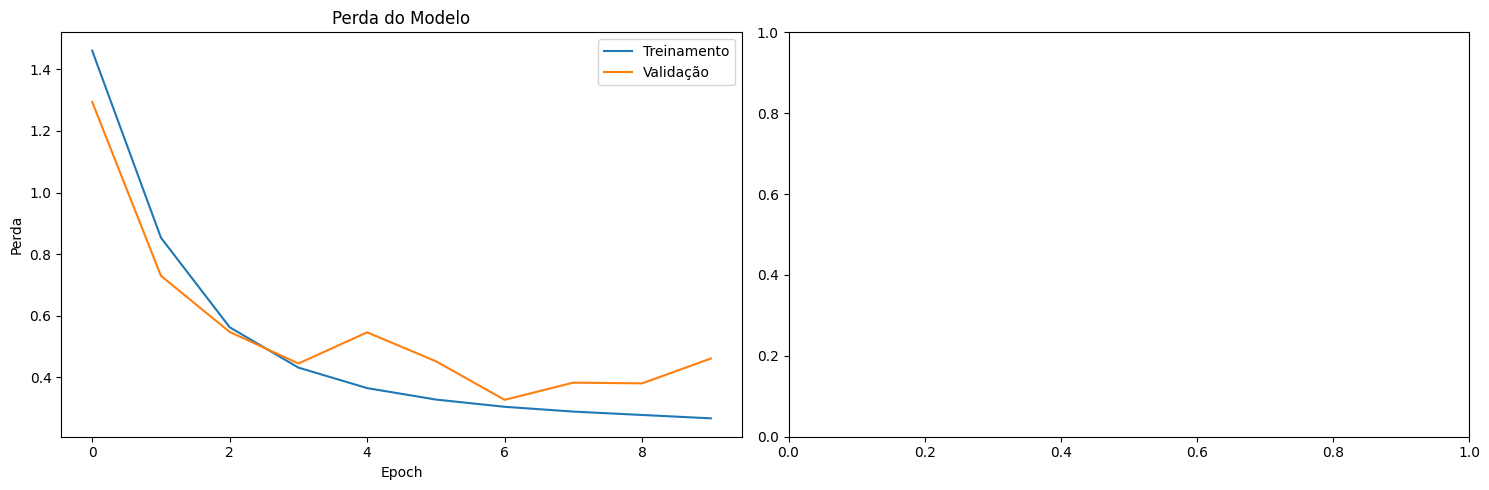

In [78]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Lista de métricas para plotar
    metrics = ['loss', 'accuracy']
    if 'val_loss' in history.history:
        metrics.extend(['val_loss', 'val_accuracy'])

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Plot de perda
    axs[0].plot(history.history['loss'], label='Treinamento')
    if 'val_loss' in history.history:
        axs[0].plot(history.history['val_loss'], label='Validação')
    axs[0].set_title('Perda do Modelo')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Perda')
    axs[0].legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

(-0.5, 127.5, 127.5, -0.5)

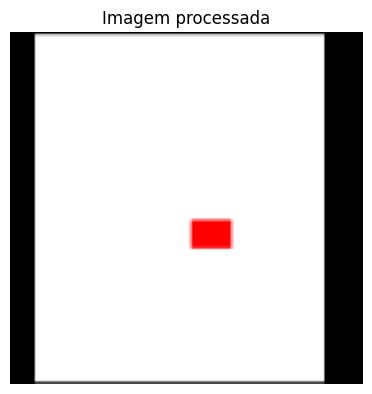

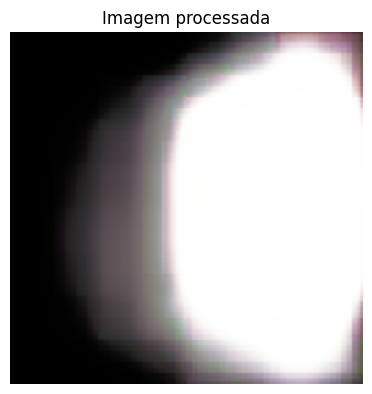

In [76]:
index_train = np.random.randint(0, y_pred.shape[0])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(y_teste_transformed[index])
plt.title("Imagem processada")
plt.axis('off')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(y_pred[index])
plt.title("Imagem processada")
plt.axis('off')